In [ ]:
https://www.kaggle.com/code/dansbecker/classification/data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
train_data = pd.read_csv("train_mobile.csv")
test_data = pd.read_csv("test_mobile.csv")

In [5]:
train_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
y = train_data['price_range']
x = train_data.drop('price_range',axis = 1)

In [9]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [10]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=7)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model = RandomForestClassifier()
model.fit(train_x,train_y)

RandomForestClassifier()

In [14]:
pred_y = model.predict(val_x)
pred_y

array([3, 3, 2, 1, 0, 2, 3, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 3, 1, 2, 3, 3, 0, 0, 3, 3, 2, 3, 1, 1, 3, 2, 2, 2, 0,
       2, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1, 2, 3, 3, 1, 1, 1, 3, 0, 3,
       3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 2, 1, 1, 0, 0, 1,
       1, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 0, 3, 2, 2,
       3, 3, 2, 0, 0, 2, 0, 2, 0, 3, 2, 1, 0, 2, 3, 0, 1, 0, 0, 3, 3, 2,
       1, 0, 3, 1, 3, 1, 1, 0, 0, 0, 1, 3, 3, 1, 0, 1, 2, 0, 2, 0, 3, 1,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 3, 2, 3, 0, 1, 1, 0, 1, 0,
       3, 2, 2, 0, 2, 2, 3, 0, 0, 3, 1, 2, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1,
       3, 0, 0, 2, 2, 0, 0, 2, 3, 0, 1, 0, 0, 2, 2, 1, 1, 2, 3, 3, 1, 2,
       1, 0, 3, 1, 3, 2, 2, 2, 0, 3, 2, 0, 2, 0, 0, 0, 3, 1, 0, 3, 2, 3,
       1, 1, 1, 2, 3, 3, 0, 1, 3, 0, 0, 1, 2, 1, 3, 3, 3, 1, 1, 1, 1, 3,
       0, 3, 1, 2, 2, 3, 2, 3, 2, 0, 0, 3, 3, 1, 1, 1, 3, 2, 1, 1, 3, 2,
       0, 3, 2, 3, 2, 2, 2, 1, 1, 0, 2, 1, 3, 0, 0,

In [15]:
import sklearn.metrics as metrics

In [16]:
accuracy = metrics.accuracy_score(val_y, pred_y)
print("Accuracy: ", accuracy)

Accuracy:  0.874


In [17]:
confusion = metrics.confusion_matrix(val_y, pred_y)


for row in confusion:
    print(row/row.sum())

[0.96323529 0.03676471 0.         0.        ]
[0.05454545 0.84545455 0.1        0.        ]
[0.         0.15267176 0.77862595 0.06870229]
[0.         0.         0.09756098 0.90243902]


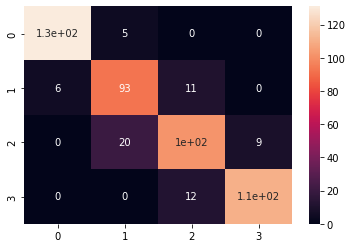

In [18]:
import seaborn as sns
sns.heatmap(confusion,annot = True)